In [ ]:
pip install numpy matplotlib pillow tensorflow

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_images_from_folder(path='/content/drive/MyDrive/Paintings'):
    images = []
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Resize images to a consistent size
        if img is not None:
            images.append(np.array(img))
    return images

In [ ]:
load_images_from_folder('/content/drive/MyDrive/Paintings/leonardo/ermine')

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [ ]:
load_images_from_folder('/content/drive/MyDrive/Paintings/leonardo/mona')

[array([[[ 84, 111,  80],
         [ 83, 110,  79],
         [ 82, 109,  78],
         ...,
         [ 75,  94,  65],
         [ 72,  91,  63],
         [ 68,  87,  59]],
 
        [[ 87, 112,  81],
         [ 86, 113,  79],
         [ 86, 111,  80],
         ...,
         [ 86, 104,  74],
         [ 81,  99,  71],
         [ 77,  95,  66]],
 
        [[ 93, 116,  82],
         [ 93, 117,  81],
         [ 93, 116,  81],
         ...,
         [ 96, 112,  82],
         [ 89, 105,  76],
         [ 84, 100,  71]],
 
        ...,
 
        [[ 48,  38,  64],
         [ 29,  20,  45],
         [ 18,   8,  34],
         ...,
         [ 26,  19,  42],
         [ 23,  16,  40],
         [ 28,  22,  45]],
 
        [[ 60,  53,  80],
         [ 33,  26,  54],
         [ 17,  10,  38],
         ...,
         [ 23,  18,  42],
         [ 48,  43,  66],
         [ 57,  53,  75]],
 
        [[ 72,  67,  97],
         [ 40,  35,  65],
         [ 22,  17,  47],
         ...,
         [ 22,  18,  42],
  

In [ ]:
load_images_from_folder('/content/drive/MyDrive/Paintings/leonardo/supper')

[array([[[ 97,  75,  52],
         [109,  87,  64],
         [ 87,  65,  42],
         ...,
         [116,  88,  66],
         [107,  79,  57],
         [139, 111,  89]],
 
        [[109,  87,  65],
         [ 85,  64,  41],
         [ 78,  57,  34],
         ...,
         [115,  87,  65],
         [106,  78,  56],
         [136, 108,  86]],
 
        [[124, 104,  82],
         [ 79,  59,  37],
         [ 75,  55,  32],
         ...,
         [118,  90,  68],
         [109,  81,  60],
         [134, 107,  85]],
 
        ...,
 
        [[ 82,  59,  43],
         [ 82,  59,  44],
         [ 84,  61,  44],
         ...,
         [ 65,  46,  29],
         [ 65,  46,  29],
         [ 65,  46,  29]],
 
        [[ 81,  58,  41],
         [ 82,  59,  42],
         [ 84,  61,  43],
         ...,
         [ 65,  46,  29],
         [ 65,  46,  29],
         [ 65,  46,  29]],
 
        [[ 84,  61,  43],
         [ 85,  62,  44],
         [ 87,  64,  45],
         ...,
         [ 64,  45,  28],
  

In [ ]:
load_images_from_folder('/content/drive/MyDrive/Paintings/vago/man')

[array([[[199, 185,  36],
         [213, 199,  51],
         [208, 193,  47],
         ...,
         [214, 193,  64],
         [229, 198,  69],
         [224, 190,  61]],
 
        [[228, 213,  67],
         [196, 182,  35],
         [215, 199,  54],
         ...,
         [212, 191,  64],
         [208, 183,  53],
         [207, 179,  50]],
 
        [[239, 223,  81],
         [229, 213,  70],
         [230, 213,  69],
         ...,
         [224, 207,  79],
         [213, 200,  68],
         [210, 195,  65]],
 
        ...,
 
        [[180, 154,  95],
         [174, 152,  95],
         [167, 148,  97],
         ...,
         [ 86, 158, 182],
         [ 93, 165, 193],
         [115, 181, 202]],
 
        [[184, 151,  86],
         [173, 143,  82],
         [155, 131,  77],
         ...,
         [118, 183, 196],
         [137, 188, 191],
         [144, 187, 181]],
 
        [[147, 109,  44],
         [152, 117,  57],
         [155, 129,  77],
         ...,
         [154, 220, 227],
  

In [ ]:
load_images_from_folder('/content/drive/MyDrive/Paintings/vago/star')

[array([[[ 23,  23,  33],
         [ 45,  42,  49],
         [ 67,  61,  64],
         ...,
         [ 28,  42,  81],
         [ 27,  42,  75],
         [ 23,  35,  73]],
 
        [[ 38,  38,  54],
         [ 57,  57,  71],
         [ 44,  44,  60],
         ...,
         [ 43,  48,  89],
         [ 36,  45,  77],
         [ 28,  41,  76]],
 
        [[ 62,  68,  97],
         [ 70,  74, 101],
         [103, 107, 133],
         ...,
         [ 62,  71, 101],
         [ 71,  79,  96],
         [ 75,  78,  97]],
 
        ...,
 
        [[ 65,  62,  58],
         [ 80,  74,  69],
         [ 63,  52,  63],
         ...,
         [ 77,  84,  87],
         [ 51,  61,  66],
         [ 43,  51,  56]],
 
        [[ 42,  41,  45],
         [ 44,  46,  30],
         [ 51,  51,  41],
         ...,
         [ 76,  89,  83],
         [ 69,  81,  82],
         [ 78,  88,  94]],
 
        [[ 69,  65,  53],
         [ 58,  55,  60],
         [ 47,  50,  37],
         ...,
         [ 76,  78,  69],
  

In [ ]:
load_images_from_folder('/content/drive/MyDrive/Paintings/vago/sunf')

[array([[[192, 191, 109],
         [199, 198, 116],
         [204, 203, 121],
         ...,
         [200, 208, 124],
         [200, 209, 126],
         [200, 209, 126]],
 
        [[179, 177,  94],
         [185, 184, 101],
         [191, 189, 107],
         ...,
         [196, 202, 113],
         [194, 202, 114],
         [194, 202, 114]],
 
        [[177, 172,  87],
         [183, 180,  93],
         [189, 185,  99],
         ...,
         [206, 209, 113],
         [206, 209, 112],
         [206, 209, 112]],
 
        ...,
 
        [[184, 171,  87],
         [160, 149,  64],
         [171, 160,  70],
         ...,
         [178, 168,  50],
         [174, 165,  46],
         [173, 164,  45]],
 
        [[182, 162,  56],
         [181, 160,  57],
         [182, 160,  63],
         ...,
         [187, 171,  62],
         [185, 168,  60],
         [167, 149,  41]],
 
        [[187, 161,  40],
         [192, 167,  49],
         [189, 162,  58],
         ...,
         [191, 171,  69],
  

In [ ]:

    vangogh_sunflower = load_images_from_folder('/content/drive/MyDrive/Paintings/vago/sunf')
    vangogh_man = load_images_from_folder('/content/drive/MyDrive/Paintings/vago/man')
    vangogh_starry = load_images_from_folder('/content/drive/MyDrive/Paintings/vago/star')

    leonardo_mona = load_images_from_folder('/content/drive/MyDrive/Paintings/leonardo/mona')
    leonardo_supper = load_images_from_folder('/content/drive/MyDrive/Paintings/leonardo/supper')
    leonardo_ladywithermine = load_images_from_folder('/content/drive/MyDrive/Paintings/leonardo/ermine')

    # Assign labels: 0 for Van Gogh, 1 for Leonardo da Vinci
    labels = [0] * len(vangogh_sunflower) + [0] * len(vangogh_man) + [0] * len(vangogh_starry) + \
             [1] * len(leonardo_mona) + [1] * len(leonardo_supper) + [1] * len(leonardo_ladywithermine)

    # Combine data and labels
    data = np.concatenate([vangogh_sunflower, vangogh_man, vangogh_starry,
                           leonardo_mona, leonardo_supper, leonardo_ladywithermine])

In [ ]:
 data = np.concatenate([vangogh_sunflower, vangogh_man, vangogh_starry,
                           leonardo_mona, leonardo_supper, leonardo_ladywithermine])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
labels = to_categorical(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Two units for binary classification
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
1/1 [==============================] - 1s 805ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
1/1 [==============================] - 1s 980ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
1/1 [==============================] - 1s 992ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 1s 977ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 1s 910ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.00

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 70ms/epoch - 70ms/step

Test accuracy: 1.0


In [ ]:
import random

In [ ]:
class_names = {0: 'Van Gogh', 1: 'Leonardo Da Vinci'}

In [ ]:
unique_labels = np.unique(labels)

In [ ]:

    vangogh_sunflower = load_images_from_folder('/content/drive/MyDrive/Samples/vago/sunf')
    vangogh_man = load_images_from_folder('/content/drive/MyDrive/Samples/vago/man')
    vangogh_starry = load_images_from_folder('/content/drive/MyDrive/Samples/vago/star')

    leonardo_mona = load_images_from_folder('/content/drive/MyDrive/Samples/leonardo/mona')
    leonardo_supper = load_images_from_folder('/content/drive/MyDrive/Samples/leonardo/supper')
    leonardo_ladywithermine = load_images_from_folder('/content/drive/MyDrive/Samples/leonardo/ermine')

    # Assign labels: 0 for Van Gogh, 1 for Leonardo da Vinci
    train_labels = [0] * len(vangogh_sunflower) + [0] * len(vangogh_man) + [0] * len(vangogh_starry) + \
             [1] * len(leonardo_mona) + [1] * len(leonardo_supper) + [1] * len(leonardo_ladywithermine)

    # Combine data and labels
    X_train = np.concatenate([vangogh_sunflower, vangogh_man, vangogh_starry,
                           leonardo_mona, leonardo_supper, leonardo_ladywithermine])

In [ ]:
train_labels_one_hot = to_categorical(train_labels)

In [ ]:
train_predictions = model.predict(X_train)

1/1 [==============================] - 0s 160ms/step


In [ ]:
num_display = min(5, len(X_train))
selected_indices = random.sample(range(len(X_train)), num_display)

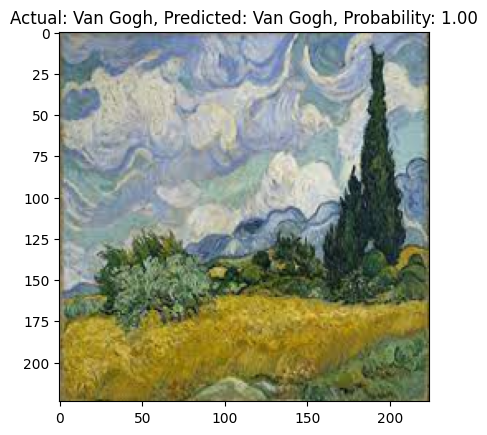

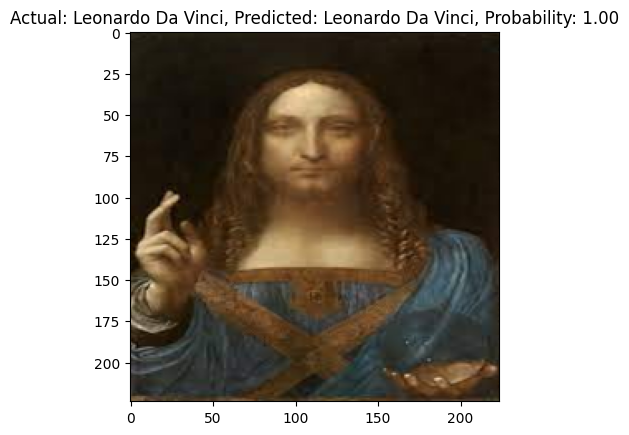

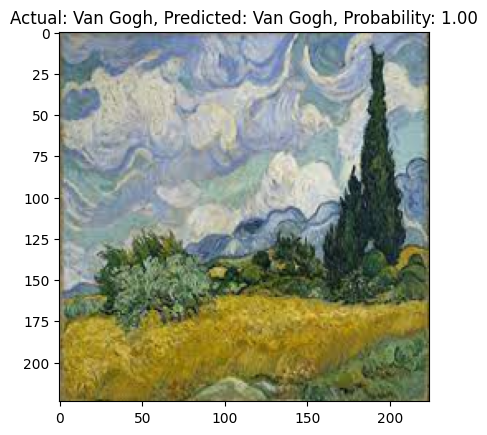

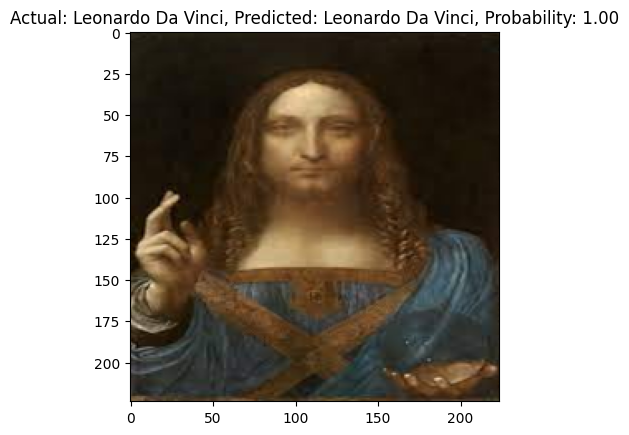

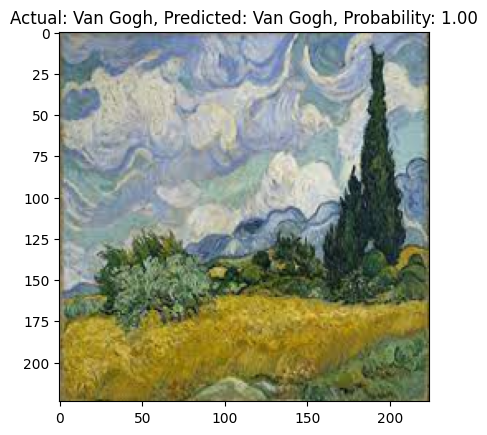

In [ ]:
for i in selected_indices:
    # Display the image
    plt.imshow(X_train[i])

    # Get the actual class index
    actual_class_index = np.argmax(train_labels_one_hot[i])

    # Get the actual artist name using the class_names mapping
    actual_artist_name = class_names[actual_class_index]

    # Get the predicted class index
    predicted_class_index = np.argmax(train_predictions[i])

    # Get the predicted artist name using the class_names mapping
    predicted_artist_name = class_names[predicted_class_index]

    plt.title(f"Actual: {actual_artist_name}, Predicted: {predicted_artist_name}, "
              f"Probability: {train_predictions[i][predicted_class_index]:.2f}")
    plt.show()